### Text Classification

BBC News Summary Dataset is a very vast data set consisting of around 2500+ news articles and summaries from 5 different categories Business, Politics, Sports, Tech and Entertainment.

To begin with we imported all the necessary modules and functions including but not limited to numpy, pandas, nltk, datasets, wordcloud, ML models from sklearn library etc. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from datasets import load_metric
from nltk.translate.bleu_score import corpus_bleu
from transformers import pipeline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jpatchigolla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jpatchigolla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from string import punctuation
from functools import reduce



In [339]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from nltk.stem import PorterStemmer, WordNetLemmatizer

### Exploratory Data Analysis

1. Read the articles and summaries in to dataframes
2. Plotted the number of articles present in each category using countplot visualizaiton from seaborn library
3. Computed the article length, summary length for each article in the dataset
4. Plotted the article lengths and summary lengths in a seaborn histogram by various categories

#### Observations

Clearly it's observed that there are 5 categories of articles and summaries
Average Summary length for each article is around 0.4 times the article length. This is clearly depicted in the histplots.

In [12]:
import os
import pandas as pd
path_, filename_, category_, = [],[],[]
for dirname, _, filenames in os.walk('C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC News Summary/News Articles/'):
    for filename in filenames:
        path_.append(os.path.join(dirname, filename))
        filename_.append(filename)
        category_.append(dirname.split("/")[-1])

In [13]:
df_articles = pd.DataFrame({"path":path_, "filename":filename_, "category":category_, }, columns=["path", "filename", "category"])
df_articles.head()

,path,filename,category
0,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,001.txt,business
1,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,002.txt,business
2,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,003.txt,business
3,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,004.txt,business
4,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,005.txt,business


In [14]:
df_articles['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

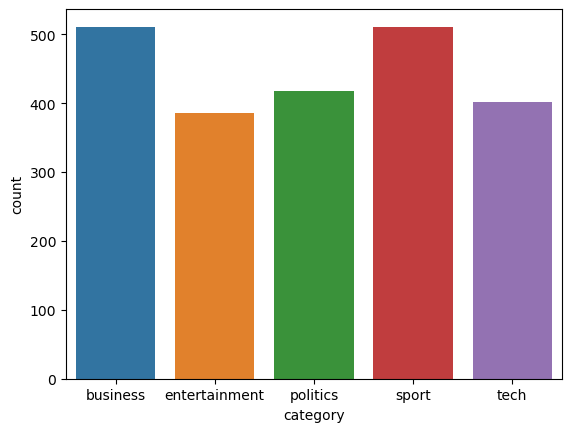

In [15]:
sns.countplot(data=df_articles, x='category')

In [16]:
path_, filename_, category_, = [],[],[]
for dirname, _, filenames in os.walk('C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC News Summary/Summaries/'):
    for filename in filenames:
        path_.append(os.path.join(dirname, filename))
        filename_.append(filename)
        category_.append(dirname.split("/")[-1])

In [17]:
df_summaries = pd.DataFrame({"path":path_, "filename":filename_, "category":category_, }, columns=["path", "filename", "category"])
df_summaries.head()

,path,filename,category
0,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,001.txt,business
1,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,002.txt,business
2,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,003.txt,business
3,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,004.txt,business
4,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,005.txt,business


<Axes: xlabel='category', ylabel='count'>

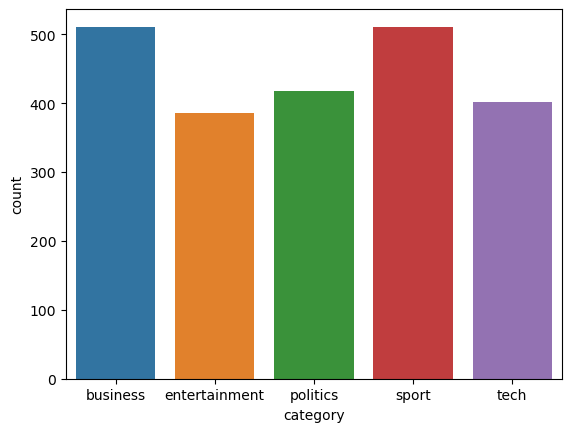

In [18]:
sns.countplot(data=df_summaries, x='category')

In [21]:
df_articles['path'][1]

'C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC News Summary/News Articles/business\\002.txt'

In [28]:
articles_length = []
summaries_length = []
for article in df_articles['path']:
    file = open(article, 'r')
    text = file.read()
    words = word_tokenize(text)
    articles_length.append(len(words))
df_articles['article_length'] = articles_length

for summary in df_summaries['path']:
    file = open(summary, 'r')
    text = file.read()
    words = word_tokenize(text)
    summaries_length.append(len(words))   
df_articles['summary_length'] = summaries_length

df_articles.head()



,path,filename,category,article_length,summary_length
0,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,001.txt,business,490,160
1,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,002.txt,business,433,178
2,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,003.txt,business,294,132
3,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,004.txt,business,472,227
4,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,005.txt,business,306,123


In [44]:
df_articles['art_summ_ratio'] = (df_articles['article_length']/df_articles['summary_length']) 
df_articles['art_summ_ratio'].mean()

2.4163719358982023

In [53]:
df_articles['summ_art_ratio'] = (df_articles['summary_length']/df_articles['article_length']) 
df_articles['summ_art_ratio'].mean()

0.4202672756584203

<Axes: xlabel='article_length', ylabel='Count'>

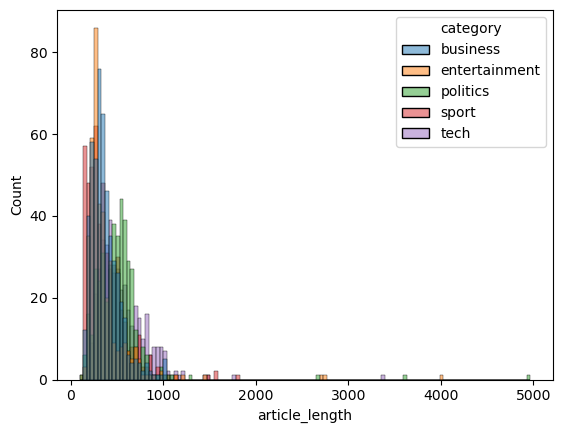

In [66]:
sns.histplot(data = df_articles, x= 'article_length',hue='category')


<Axes: xlabel='summary_length', ylabel='Count'>

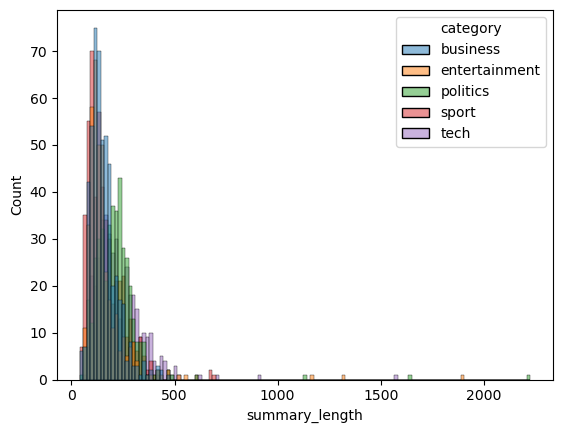

In [59]:
sns.histplot(data = df_articles, x= 'summary_length',hue='category',kde=True)

<Axes: >

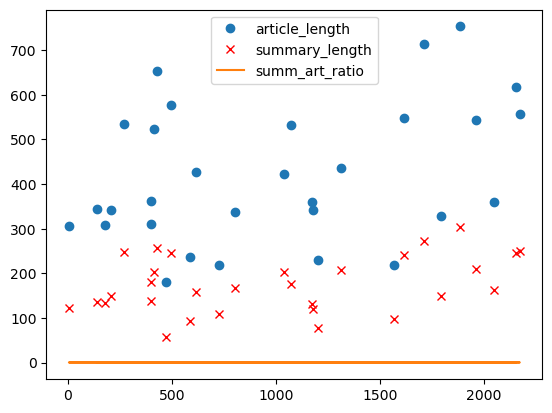

In [64]:
# The below plot shows the articles lengths and summary lengths for a randomly picked sample of 30 articles. If you observe, the article to summary ratio is pretty constant.
# On an average summary length is 0.4 times the article length. So, the articles are summarized to 40% of their content.

df_articles[['article_length','summary_length', 'summ_art_ratio']].sample(30).plot(style=['o','rx'])

### Exploratory Data Analysis contd...

1. Read the articles and summaries using file operations and added them to the dataframe as new columns **'article_text'** and **'summary_text'**
2. As we would like to train classification models on the article texts to predict the category article belongs to, created a new dataframe and series object with the article texts and categories as X and y.
3. Split the dataset into training and test datasets using train_test_split function with a test_size of 0.3. 


In [67]:
article_text = []
for article in df_articles['path']:
    file = open(article, 'r')
    text = file.read()
    article_text.append(text)
df_articles['article_text'] = article_text
df_articles.head()

,path,filename,category,article_length,summary_length,art_summ_ratio,summ_art_ratio,article_text
0,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,001.txt,business,490,160,3.062500,0.326531,Ad sales boost Time Warner profit\n\nQuarterly...
1,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,002.txt,business,433,178,2.432584,0.411085,Dollar gains on Greenspan speech\n\nThe dollar...
2,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,003.txt,business,294,132,2.227273,0.448980,Yukos unit buyer faces loan claim\n\nThe owner...
3,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,004.txt,business,472,227,2.079295,0.480932,High fuel prices hit BA's profits\n\nBritish A...
4,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,005.txt,business,306,123,2.487805,0.401961,Pernod takeover talk lifts Domecq\n\nShares in...


In [72]:
summary_text = []
for summary in df_summaries['path']:
    file = open(summary, 'r')
    text = file.read()
    summary_text.append(text)
df_articles['summary_text'] = summary_text
df_articles.head()

,path,filename,category,article_length,summary_length,art_summ_ratio,summ_art_ratio,article_text,summary_text
0,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,001.txt,business,490,160,3.062500,0.326531,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,002.txt,business,433,178,2.432584,0.411085,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...
2,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,003.txt,business,294,132,2.227273,0.448980,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...
3,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,004.txt,business,472,227,2.079295,0.480932,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."
4,C:/Users/jpatchigolla/Desktop/UCB/Capstone/BBC...,005.txt,business,306,123,2.487805,0.401961,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...


In [93]:
X = df_articles[['article_text']]
y = df_articles['category']
X_train, X_test, y_train,y_test = train_test_split(X['article_text'],y,test_size = 0.3, random_state = 42)
print(X.shape)
print(X_train.shape)

(2225, 1)
(1557,)


In [94]:
len(y_train)

1557

### Feature Engineering

Performed the below feature engineering techniques on the article text for both training and test datasets
1. Tokenized the words
2. Performed Lemmatization
3. Removed the stop words and punctuation


In [95]:
X_train.head()

1617    Kirwan demands Italy consistency\n\nItaly coac...
1706    Tindall wants second opinion\n\nEngland centre...
1639    Sella wants Michalak recall\n\nFormer France c...
1221    Prime minister's questions\n\nSo who, if anyon...
680     US 'to raise TV indecency fines'\n\nUS politic...
Name: article_text, dtype: object

In [341]:


def word_processing(text):
    lemma = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemma.lemmatize(w) for w in words]
    new_text = []
    word_frequencies = {}
    for word in lemmatized_words:
        if word.lower() not in stopwords.words('english'):
            if word.lower() not in punctuation:
                new_text.append(word)
    return(' '.join(new_text))

In [342]:
X_train = X_train.apply(word_processing)


In [343]:
X_train.head()

1617    Kirwan demand Italy consistency Italy coach Jo...
1706    Tindall want second opinion England centre Mik...
1639    Sella want Michalak recall Former France centr...
1221    Prime minister 's question anyone playing poli...
680     US 'to raise TV indecency fines' US politician...
Name: article_text, dtype: object

In [369]:
X_test = X_test.apply(word_processing)
X_test.head()

414     UK house price dip November UK house price dip...
420     LSE 'sets date takeover deal' London Stock Exc...
1644    Harinordoquy suffers France axe Number eight I...
416     Barclays share merger talk Shares UK banking g...
1232    Campaign 'cold call questioned Labour Conserva...
Name: article_text, dtype: object

### Bag of Words

Now after completing the feature engineering, the article texts are ready for conversion to numerical features and train the classification models

Vectorized the words from article using **CountVectorizer** first and fit the training data to **LogisticRegression, Naive Bayes,SVM and AdaBoost** classifiers.

Computed the accuracy for each model and created a dataframe to visualize the results.

Now used the **TFIDVectorizer** to vectorize the words and repeated the model training and accuracy scores computation

In [370]:
cvect = CountVectorizer(max_features = 100, stop_words = 'english')
dtm = cvect.fit_transform(X_train)
pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out()).head()

,000,10,2004,added,award,bbc,best,blair,britain,british,...,use,used,wa,want,way,week,win,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,2,0,1,1,0,0,0,...,0,0,3,1,2,0,3,0,3,2
3,0,0,0,0,0,0,0,2,0,0,...,0,0,5,0,0,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [371]:
# Creatd an empty dataframe to capture the test accuracies for each classification model while using CountVectorizer or TFIDVectorizer

bag_of_words = ['CountVectorizer', 'TfidVectorizer']
clf_models = ['Naive Bayes', 'LogisticRegression', 'SVC', 'Adaboost']
df_acc = pd.DataFrame(bag_of_words, columns=['Bag of Words'])
df_acc[clf_models] = [0,0,0,0]
df_acc.set_index('Bag of Words')

,Naive Bayes,LogisticRegression,SVC,Adaboost
Bag of Words,,,,
CountVectorizer,0,0,0,0
TfidVectorizer,0,0,0,0


### Countvectorizer to convert text into numerical features
### Use ML models - LogisticRegression, Naive Bayes,SVM, Random Forest

In [372]:
vect_pipe_1 = Pipeline([('cvect', CountVectorizer()),
                       ('lgr', LogisticRegression())])

params = {'cvect__max_features': [2000,3000,4000,5000],
         'cvect__stop_words': ['english', None]}

grid = GridSearchCV(vect_pipe_1, param_grid=params)
grid.fit(X_train, y_train)
test_acc = grid.score(X_test, y_test)
print(test_acc)
df_acc.loc[df_acc['Bag of Words'] == 'CountVectorizer','LogisticRegression'] = test_acc


0.9655688622754491


In [373]:
grid.best_params_

{'cvect__max_features': 4000, 'cvect__stop_words': 'english'}

In [374]:
preds = pd.DataFrame(grid.predict(X_test),y_test).reset_index()
preds.head(10)


,category,0
0,business,business
1,business,business
2,sport,sport
3,business,business
4,politics,politics
5,sport,sport
6,sport,sport
7,politics,politics
8,entertainment,entertainment
9,politics,politics


In [375]:
vect_pipe_naive_bayes = Pipeline([('cvect', CountVectorizer(max_features = 3000, stop_words = 'english')),
                       ('bayes', MultinomialNB())])
vect_pipe_naive_bayes.fit(X_train, y_train)
cvect_naive_bayes_acc = vect_pipe_naive_bayes.score(X_test, y_test)
df_acc.loc[df_acc['Bag of Words'] == 'CountVectorizer','Naive Bayes'] = cvect_naive_bayes_acc
print(cvect_naive_bayes_acc)

0.9730538922155688


In [376]:
vect_pipe_svm = Pipeline([('cvect', CountVectorizer(max_features = 3000, stop_words = 'english')),
                       ('svc', SVC())])
vect_pipe_svm.fit(X_train, y_train)
cvect_svm_acc = vect_pipe_svm.score(X_test, y_test)
df_acc.loc[df_acc['Bag of Words'] == 'CountVectorizer','SVC'] = cvect_svm_acc
print(cvect_svm_acc)

0.9580838323353293


In [377]:
vect_pipe_adaboost = Pipeline([('cvect', CountVectorizer(max_features = 3000, stop_words = 'english')),
                       ('ada', AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 200, random_state = 42))])
vect_pipe_adaboost.fit(X_train, y_train)
cvect_adaboost_acc = vect_pipe_adaboost.score(X_test, y_test)
print(cvect_adaboost_acc)

df_acc.loc[df_acc['Bag of Words'] == 'CountVectorizer','Adaboost'] = cvect_adaboost_acc

C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8398203592814372


In [378]:
df_acc

,Bag of Words,Naive Bayes,LogisticRegression,SVC,Adaboost
0,CountVectorizer,0.973054,0.965569,0.958084,0.83982
1,TfidVectorizer,0.000000,0.000000,0.000000,0.00000


### TFIDF to convert text into numerical features
### Use ML models - LogisticRegression, Naive Bayes,SVM, AdaBoost and measure accuracy of predictions

In [379]:
tfidf_pipe_naive_bayes = Pipeline([('tfidf', TfidfVectorizer()),
                       ('bayes', MultinomialNB())])

params = {'tfidf__max_features': [2000,3000,4000,5000],
         'tfidf__stop_words': ['english', None]}

grid_tfidf = GridSearchCV(tfidf_pipe_naive_bayes, param_grid=params)

grid_tfidf.fit(X_train, y_train)
tfidf_naive_bayes_acc = grid_tfidf.score(X_test, y_test)
df_acc.loc[df_acc['Bag of Words'] == 'TfidVectorizer','Naive Bayes']=tfidf_naive_bayes_acc
print(tfidf_naive_bayes_acc)

0.9730538922155688


In [380]:
grid_tfidf.best_params_

{'tfidf__max_features': 5000, 'tfidf__stop_words': 'english'}

In [381]:
tfidf_pipe_logreg = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000, stop_words = 'english')),
                       ('lgr', LogisticRegression())])
tfidf_pipe_logreg.fit(X_train, y_train)
tfidf_logreg_acc = tfidf_pipe_logreg.score(X_test, y_test)
print(tfidf_logreg_acc)

df_acc.loc[df_acc['Bag of Words'] == 'TfidVectorizer','LogisticRegression']=tfidf_logreg_acc

0.9775449101796407


In [382]:
tfidf_pipe_svm = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000, stop_words = 'english')),
                       ('svm', SVC())])
tfidf_pipe_svm.fit(X_train, y_train)
tfidf_svm_acc = tfidf_pipe_svm.score(X_test, y_test)
print(tfidf_svm_acc)
df_acc.loc[df_acc['Bag of Words'] == 'TfidVectorizer','SVC'] = tfidf_svm_acc

0.9775449101796407


In [383]:
tfidf_pipe_adaboost = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000, stop_words = 'english')),
                       ('ada', AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 200, random_state = 42))])
tfidf_pipe_adaboost.fit(X_train, y_train)
tfidf_adaboost_acc = tfidf_pipe_adaboost.score(X_test, y_test)
print(tfidf_adaboost_acc)
df_acc.loc[df_acc['Bag of Words'] == 'TfidVectorizer','Adaboost'] = tfidf_adaboost_acc

C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8413173652694611


In [384]:
df_acc

,Bag of Words,Naive Bayes,LogisticRegression,SVC,Adaboost
0,CountVectorizer,0.973054,0.965569,0.958084,0.839820
1,TfidVectorizer,0.973054,0.977545,0.977545,0.841317


#### Observations

From the above table of accuracies, it's evident that with the text classification, Adaboost gives the least accuracy. 
When CountVectorizer is used to vectorize the words, Naive Bayes gives the best accuracy. 
With TfidVectorizer, accuracies of Naive Bayes, LogisticRegression and SVC are almost the same. SVC is just a little bit higher.

Now we will move forward with improving the model.

### Improving the models with finding best hyperparameters for each of them

In [385]:
# Creating an empty dataframe to capture the test accuracies for each of the improved classification model while using CountVectorizer or TFIDVectorizer

bag_of_words = ['CountVectorizer', 'TfidVectorizer']
clf_models = ['Naive Bayes', 'LogisticRegression', 'SVC', 'Adaboost']
df_acc_improved = pd.DataFrame(bag_of_words, columns=['Bag of Words'])
df_acc_improved[clf_models] = [0,0,0,0]
df_acc_improved.set_index('Bag of Words')
df_acc_improved

,Bag of Words,Naive Bayes,LogisticRegression,SVC,Adaboost
0,CountVectorizer,0,0,0,0
1,TfidVectorizer,0,0,0,0


In [386]:
vect_pipe_imp = Pipeline([('cvect', CountVectorizer(max_features = 3000, stop_words = 'english')),
                       ('lgr', LogisticRegression())])

logreg_params = {'lgr__multi_class': ['multinomial','auto', 'ovr']}

logreg_grid = GridSearchCV(vect_pipe_imp, param_grid = logreg_params).fit(X_train, y_train)

logreg = logreg_grid.best_estimator_
logreg.fit(X_train,y_train)
print(logreg_grid.best_params_)
test_acc = logreg.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'CountVectorizer','LogisticRegression'] = test_acc

print(test_acc)


{'lgr__multi_class': 'ovr'}
0.9625748502994012


In [387]:
vect_pipe_imp_nb = Pipeline([('cvect', CountVectorizer(max_features = 3000, stop_words = 'english')),
                       ('nb', MultinomialNB())])

nb_params = {'nb__alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

nb_grid = GridSearchCV(vect_pipe_imp_nb, param_grid = nb_params).fit(X_train, y_train)
print(nb_grid.best_params_)

nb_est = nb_grid.best_estimator_

nb_est.fit(X_train,y_train)
test_acc = nb_est.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'CountVectorizer','Naive Bayes'] = test_acc

print(test_acc)

{'nb__alpha': 1}
0.9730538922155688


In [388]:
vect_pipe_imp_svc = Pipeline([('cvect', CountVectorizer(max_features = 3000, stop_words = 'english')),
                       ('svc', SVC())])

svc_params = {'svc__kernel': ['rbf', 'poly', 'linear']}

svc_grid = GridSearchCV(vect_pipe_imp_svc, param_grid = svc_params).fit(X_train, y_train)
print(svc_grid.best_params_)

svc_est = svc_grid.best_estimator_

svc_est.fit(X_train,y_train)
test_acc = svc_est.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'CountVectorizer','SVC'] = test_acc

print(test_acc)

{'svc__kernel': 'linear'}
0.9550898203592815


In [389]:
vect_pipe_imp_ada = Pipeline([('cvect', CountVectorizer(max_features = 3000, stop_words = 'english')),
                       ('ada', AdaBoostClassifier(DecisionTreeClassifier(), random_state = 42))])

ada_params = {'ada__n_estimators':  [100, 200],
             'ada__estimator__max_depth': [1, 2, 3]}

ada_grid = GridSearchCV(vect_pipe_imp_ada, param_grid = ada_params).fit(X_train, y_train)
print(ada_grid.best_params_)

ada_est = ada_grid.best_estimator_

ada_est.fit(X_train,y_train)
test_acc = ada_est.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'CountVectorizer','Adaboost'] = test_acc

print(test_acc)

C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

{'ada__estimator__max_depth': 3, 'ada__n_estimators': 200}


C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9476047904191617


In [390]:
df_acc_improved

,Bag of Words,Naive Bayes,LogisticRegression,SVC,Adaboost
0,CountVectorizer,0.973054,0.962575,0.95509,0.947605
1,TfidVectorizer,0.000000,0.000000,0.00000,0.000000


In [391]:
### Improving models and finding accuracies with TFIDF vectorization

In [392]:
tfidf_pipe_imp = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000, stop_words = 'english')),
                       ('lgr', LogisticRegression())])

logreg_params = {'lgr__multi_class': ['multinomial','auto', 'ovr']}

logreg_grid = GridSearchCV(tfidf_pipe_imp, param_grid = logreg_params).fit(X_train, y_train)

logreg = logreg_grid.best_estimator_
logreg.fit(X_train,y_train)
print(logreg_grid.best_params_)
test_acc = logreg.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'TfidVectorizer','LogisticRegression'] = test_acc

print(test_acc)

{'lgr__multi_class': 'multinomial'}
0.9775449101796407


In [393]:
tfidf_pipe_imp_nb = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000, stop_words = 'english')),
                       ('nb', MultinomialNB())])

nb_params = {'nb__alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

nb_grid = GridSearchCV(tfidf_pipe_imp_nb, param_grid = nb_params).fit(X_train, y_train)
print(nb_grid.best_params_)

nb_est = nb_grid.best_estimator_

nb_est.fit(X_train,y_train)
test_acc = nb_est.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'TfidVectorizer','Naive Bayes'] = test_acc

print(test_acc)

{'nb__alpha': 0.1}
0.9760479041916168


In [394]:
tfid_pipe_imp_svc = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000, stop_words = 'english')),
                       ('svc', SVC())])

svc_params = {'svc__kernel': ['rbf', 'poly', 'linear']}

svc_grid = GridSearchCV(tfid_pipe_imp_svc, param_grid = svc_params).fit(X_train, y_train)
print(svc_grid.best_params_)

svc_est = svc_grid.best_estimator_

svc_est.fit(X_train,y_train)
test_acc = svc_est.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'TfidVectorizer','SVC'] = test_acc

print(test_acc)

{'svc__kernel': 'linear'}
0.9745508982035929


In [395]:
tfid_pipe_imp_ada = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000, stop_words = 'english')),
                       ('ada', AdaBoostClassifier(DecisionTreeClassifier(), random_state = 42))])

ada_params = {'ada__n_estimators':  [100, 200],
             'ada__estimator__max_depth': [1, 2, 3]}

ada_grid = GridSearchCV(tfid_pipe_imp_ada, param_grid = ada_params).fit(X_train, y_train)
print(ada_grid.best_params_)

ada_est = ada_grid.best_estimator_

ada_est.fit(X_train,y_train)
test_acc = ada_est.score(X_test, y_test)
df_acc_improved.loc[df_acc_improved['Bag of Words'] == 'TfidVectorizer','Adaboost'] = test_acc

print(test_acc)

C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

{'ada__estimator__max_depth': 3, 'ada__n_estimators': 200}


C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9461077844311377


In [396]:
parameters = [nb_grid.best_params_, logreg_grid.best_params_, svc_grid.best_params_,ada_grid.best_params_]

In [397]:
Models = ['Naive Bayes', 'LogisticRegression', 'SVC', 'Adaboost']

In [398]:
parameters

[{'nb__alpha': 0.1},
 {'lgr__multi_class': 'multinomial'},
 {'svc__kernel': 'linear'},
 {'ada__estimator__max_depth': 3, 'ada__n_estimators': 200}]

In [399]:
df_best_params = pd.DataFrame(Models, columns = ['Models'])
df_best_params['Parameters'] = parameters
df_best_params

,Models,Parameters
0,Naive Bayes,{'nb__alpha': 0.1}
1,LogisticRegression,{'lgr__multi_class': 'multinomial'}
2,SVC,{'svc__kernel': 'linear'}
3,Adaboost,"{'ada__estimator__max_depth': 3, 'ada__n_estim..."


In [400]:
df_acc_improved

,Bag of Words,Naive Bayes,LogisticRegression,SVC,Adaboost
0,CountVectorizer,0.973054,0.962575,0.955090,0.947605
1,TfidVectorizer,0.976048,0.977545,0.974551,0.946108


### Observations of Improved models

From the test accuracies computed, it's evident that when we vectorize the articles' text with TFIDF Vectorizer and fit the model LogisticRegression with the data, with model's hyper parameters multi_class = 'multinomial', gives the best accurate predictions

In [401]:
y_test_df = pd.DataFrame(y_test, columns = ['category'])
y_test_df['category'].value_counts()

business         165
sport            140
tech             125
politics         120
entertainment    118
Name: category, dtype: int64

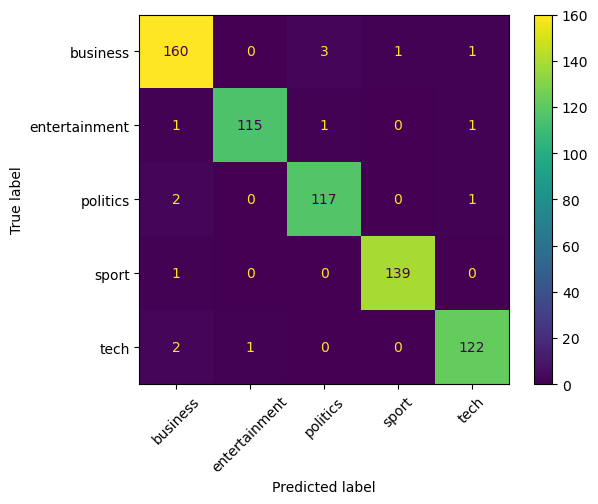

In [402]:
#Confusion Matrix

df_confusion_mat = confusion_matrix(y_test, logreg.predict(X_test), labels=['business', 'entertainment', 'politics', 'sport', 'tech'])
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion_mat, display_labels=['business', 'entertainment', 'politics', 'sport', 'tech'])
disp.plot()
plt.xticks(rotation=45)
plt.show()

### Conclusion

By trying various classificaiton models to predict the category what an article is about, we see that using TfidVectorizer to vectorize the text and fitting the model LogisticRegression would yield the best predictions. The Confusion matrix also confirms that this gives the highest accuracy and precision scores.

### Next Steps

Continue training different ensemble models and find out if there is a better model than LogisticRegression to classify the BBC News Summary data 